## Importing packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#!pip install pandas_profiling 
import pandas_profiling 
import scipy.stats as stats
import statsmodels as sm
%matplotlib inline

import sklearn as sk

plt.rcParams['figure.figsize'] = 6, 4
plt.rcParams['axes.grid'] = True

#!pip install factor_analyzer
from factor_analyzer import FactorAnalyzer

from matplotlib.backends.backend_pdf import PdfPages

In [2]:
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
from sklearn.cluster import KMeans

# center and scale the data
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.decomposition import FactorAnalysis

In [4]:
# Create Data audit Report for continuous variables
def continuous_var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  
                      x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),
                          x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), 
                              x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index = ['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1', 
                               'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

In [5]:
# Create Data audit Report for categorical variables
def categorical_var_summary(x):
    Mode = x.value_counts().sort_values(ascending = False)[0:1].reset_index()
    return pd.Series([x.count(), x.isnull().sum(), Mode.iloc[0, 0], Mode.iloc[0, 1], 
                          round(Mode.iloc[0, 1] * 100/x.count(), 2)], 
                  index = ['N', 'NMISS', 'MODE', 'FREQ', 'PERCENT'])

In [6]:
# Missing value imputation for categorical and continuous variables
def missing_imputation(x, stats = 'mean'):
    if (x.dtypes == 'float64') | (x.dtypes == 'int64'):
        x = x.fillna(x.mean()) if stats == 'mean' else x.fillna(x.median())
    else:
        x = x.fillna(x.mode())
    return x

### Importing data

In [7]:
credit_seg=pd.read_csv('F:/Rizwan/python/4. Segmentation of Credit Card Customers/cc_general.csv')
credit_seg.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### Exploratory analysis

In [8]:
credit_seg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

In [9]:
# dropping variable
credit_seg.drop(columns='CUST_ID',inplace=True)

In [10]:
conti_vars=credit_seg.select_dtypes(['float64','int64'])
conti_vars.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [11]:
# Data Summary
conti_vars.apply(continuous_var_summary).T

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
BALANCE,8950.0,0.0,1.400205e+07,1564.474828,873.385231,2081.531879,4.332775e+06,0.000000,0.065101,8.814518,23.575529,128.281915,873.385231,2054.140036,4338.563657,5909.111808,9338.804814,19043.13856
BALANCE_FREQUENCY,8950.0,0.0,7.851573e+03,0.877271,1.000000,0.236904,5.612351e-02,0.000000,0.090909,0.272727,0.454545,0.888889,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
PURCHASES,8950.0,0.0,8.978683e+06,1003.204834,361.280000,2136.634782,4.565208e+06,0.000000,0.000000,0.000000,0.000000,39.635000,361.280000,1110.130000,2542.624000,3998.619500,8977.290000,49039.57000
ONEOFF_PURCHASES,8950.0,0.0,5.302314e+06,592.437371,38.000000,1659.887917,2.755228e+06,0.000000,0.000000,0.000000,0.000000,0.000000,38.000000,577.405000,1600.099000,2671.094000,6689.898200,40761.25000
INSTALLMENTS_PURCHASES,8950.0,0.0,3.679055e+06,411.067645,89.000000,904.338115,8.178274e+05,0.000000,0.000000,0.000000,0.000000,0.000000,89.000000,468.637500,1140.070000,1750.087500,3886.240500,22500.00000
CASH_ADVANCE,8950.0,0.0,8.760896e+06,978.871112,0.000000,2097.163877,4.398096e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1113.821139,3065.534560,4647.169122,9588.163357,47137.21176
PURCHASES_FREQUENCY,8950.0,0.0,4.388637e+03,0.490351,0.500000,0.401371,1.610985e-01,0.000000,0.000000,0.000000,0.000000,0.083333,0.500000,0.916667,1.000000,1.000000,1.000000,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.0,1.811996e+03,0.202458,0.083333,0.298336,8.900441e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.300000,0.750000,1.000000,1.000000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.0,3.261714e+03,0.364437,0.166667,0.397448,1.579647e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.750000,1.000000,1.000000,1.000000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.0,1.209541e+03,0.135144,0.000000,0.200121,4.004857e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.222222,0.416667,0.583333,0.833333,1.50000


#### Outlier treatment 

In [12]:
conti_vars = conti_vars.apply(lambda x: x.clip(lower = x.quantile(0.01), upper = x.quantile(0.99)))

In [13]:
#conti_vars.apply(continuous_var_summary).T

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
BALANCE,8950.0,0.0,1.379237e+07,1541.046707,873.385231,1966.597484,3.867506e+06,0.065101,0.065248,8.814518,23.575529,128.281915,873.385231,2054.140036,4338.563657,5909.111808,9337.094398,9338.804814
BALANCE_FREQUENCY,8950.0,0.0,7.858846e+03,0.878083,1.000000,0.234032,5.477084e-02,0.090909,0.090909,0.272727,0.454545,0.888889,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
PURCHASES,8950.0,0.0,8.379252e+06,936.229237,361.280000,1525.185179,2.326190e+06,0.000000,0.000000,0.000000,0.000000,39.635000,361.280000,1110.130000,2542.624000,3998.619500,8961.796200,8977.290000
ONEOFF_PURCHASES,8950.0,0.0,4.801619e+06,536.493774,38.000000,1096.913512,1.203219e+06,0.000000,0.000000,0.000000,0.000000,0.000000,38.000000,577.405000,1600.099000,2671.094000,6684.195482,6689.898200
INSTALLMENTS_PURCHASES,8950.0,0.0,3.441260e+06,384.498368,89.000000,676.271068,4.573426e+05,0.000000,0.000000,0.000000,0.000000,0.000000,89.000000,468.637500,1140.070000,1750.087500,3885.853155,3886.240500
CASH_ADVANCE,8950.0,0.0,8.376493e+06,935.920972,0.000000,1775.774147,3.153374e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1113.821139,3065.534560,4647.169122,9584.005151,9588.163357
PURCHASES_FREQUENCY,8950.0,0.0,4.388637e+03,0.490351,0.500000,0.401371,1.610985e-01,0.000000,0.000000,0.000000,0.000000,0.083333,0.500000,0.916667,1.000000,1.000000,1.000000,1.000000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.0,1.811996e+03,0.202458,0.083333,0.298336,8.900441e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.300000,0.750000,1.000000,1.000000,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.0,3.261714e+03,0.364437,0.166667,0.397448,1.579647e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.750000,1.000000,1.000000,1.000000,1.000000
CASH_ADVANCE_FREQUENCY,8950.0,0.0,1.199449e+03,0.134017,0.000000,0.195550,3.823977e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.222222,0.416667,0.583333,0.833333,0.833333


#### Missing value treatment

In [14]:
conti_vars = conti_vars.apply(missing_imputation)

In [15]:
conti_vars.apply(continuous_var_summary).T

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
BALANCE,8950.0,0.0,1.379237e+07,1541.046707,873.385231,1966.597484,3.867506e+06,0.065101,0.065248,8.814518,23.575529,128.281915,873.385231,2054.140036,4338.563657,5909.111808,9337.094398,9338.804814
BALANCE_FREQUENCY,8950.0,0.0,7.858846e+03,0.878083,1.000000,0.234032,5.477084e-02,0.090909,0.090909,0.272727,0.454545,0.888889,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
PURCHASES,8950.0,0.0,8.379252e+06,936.229237,361.280000,1525.185179,2.326190e+06,0.000000,0.000000,0.000000,0.000000,39.635000,361.280000,1110.130000,2542.624000,3998.619500,8961.796200,8977.290000
ONEOFF_PURCHASES,8950.0,0.0,4.801619e+06,536.493774,38.000000,1096.913512,1.203219e+06,0.000000,0.000000,0.000000,0.000000,0.000000,38.000000,577.405000,1600.099000,2671.094000,6684.195482,6689.898200
INSTALLMENTS_PURCHASES,8950.0,0.0,3.441260e+06,384.498368,89.000000,676.271068,4.573426e+05,0.000000,0.000000,0.000000,0.000000,0.000000,89.000000,468.637500,1140.070000,1750.087500,3885.853155,3886.240500
CASH_ADVANCE,8950.0,0.0,8.376493e+06,935.920972,0.000000,1775.774147,3.153374e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1113.821139,3065.534560,4647.169122,9584.005151,9588.163357
PURCHASES_FREQUENCY,8950.0,0.0,4.388637e+03,0.490351,0.500000,0.401371,1.610985e-01,0.000000,0.000000,0.000000,0.000000,0.083333,0.500000,0.916667,1.000000,1.000000,1.000000,1.000000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.0,1.811996e+03,0.202458,0.083333,0.298336,8.900441e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.300000,0.750000,1.000000,1.000000,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.0,3.261714e+03,0.364437,0.166667,0.397448,1.579647e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.750000,1.000000,1.000000,1.000000,1.000000
CASH_ADVANCE_FREQUENCY,8950.0,0.0,1.199449e+03,0.134017,0.000000,0.195550,3.823977e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.222222,0.416667,0.583333,0.833333,0.833333


In [16]:
conti_vars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null float64
CREDIT_LIMIT                        8950 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS                    8950 non-null float64
PRC_FULL_PAYMENT         

#### Creating derive variables

#####  To find what type of purchases customers are making on credit card,lets explore the data.

In [17]:
credit_seg['Purchase_types']=np.where((credit_seg['INSTALLMENTS_PURCHASES']>0) & (credit_seg['ONEOFF_PURCHASES']==0),'installment',
                                        np.where((credit_seg['INSTALLMENTS_PURCHASES']==0) & (credit_seg['ONEOFF_PURCHASES']>0),'oneoff',
                                               np.where((credit_seg['INSTALLMENTS_PURCHASES']>0) & (credit_seg['ONEOFF_PURCHASES']>0),'both','cash')))

In [18]:
# An utility function to create dummy variable
def create_dummies(df, colname):
    col_dummies = pd.get_dummies(df[colname], prefix = colname, drop_first = False)
    df = pd.concat([df, col_dummies], axis = 1)
    df.drop(colname, axis = 1, inplace = True )
    return df

In [19]:
cat_vars = credit_seg[['Purchase_types']]

# for c_feature in categorical_features
for c_feature in ['Purchase_types']:
    cat_vars[c_feature] = cat_vars[c_feature].astype('category')
    cat_vars = create_dummies(cat_vars, c_feature)
    
cat_vars.head()    

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,Purchase_types_both,Purchase_types_cash,Purchase_types_installment,Purchase_types_oneoff
0,0,0,1,0
1,0,1,0,0
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [20]:
credit_seg_new = pd.concat([conti_vars, cat_vars], axis = 1)
credit_seg_new.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Purchase_types_both,Purchase_types_cash,Purchase_types_installment,Purchase_types_oneoff
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,...,2.0,1000.0,201.802084,139.509787,0.000000,12,0,0,1,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,...,0.0,7000.0,4103.032597,1072.340217,0.222222,12,0,1,0,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,...,12.0,7500.0,622.066742,627.284787,0.000000,12,0,0,0,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,...,1.0,7500.0,0.000000,767.303879,0.000000,12,0,0,0,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,...,1.0,1200.0,678.334763,244.791237,0.000000,12,0,0,0,1


In [21]:
credit_seg_new.drop(columns=['ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES'],inplace=True)

####  Deriving new KPIs

In [22]:
credit_seg_new['Limit_ratio']=(credit_seg_new.BALANCE/credit_seg_new.CREDIT_LIMIT)*100
credit_seg_new['Limit_ratio'].head()

0     4.090075
1    45.749535
2    33.268651
3    22.222274
4    68.142861
Name: Limit_ratio, dtype: float64

In [23]:
credit_seg_new.drop(columns=['CREDIT_LIMIT','BALANCE'],inplace=True)

In [24]:
credit_seg_new['paymt_ratio']=(credit_seg_new.PAYMENTS/credit_seg_new.MINIMUM_PAYMENTS)*100
credit_seg_new['paymt_ratio'].head()

0    144.650844
1    382.624146
2     99.168154
3      0.000000
4    277.107453
Name: paymt_ratio, dtype: float64

In [25]:
credit_seg_new.drop(columns=['MINIMUM_PAYMENTS','PAYMENTS'],inplace=True)

####  Correlation Matrix

In [26]:
credit_seg_new.corr()

,BALANCE_FREQUENCY,PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,PRC_FULL_PAYMENT,TENURE,Purchase_types_both,Purchase_types_cash,Purchase_types_installment,Purchase_types_oneoff,Limit_ratio,paymt_ratio
BALANCE_FREQUENCY,1.000000,0.170515,0.107785,0.232890,0.202845,0.179472,0.193894,0.162818,0.212610,-0.098040,0.121525,0.194377,0.010821,-0.132176,-0.090963,0.447095,-0.162066
PURCHASES,0.170515,1.000000,-0.091164,0.504218,0.608351,0.400843,-0.149419,-0.099497,0.780817,0.202887,0.107263,0.502341,-0.333761,-0.156000,-0.060172,-0.088140,0.175943
CASH_ADVANCE,0.107785,-0.091164,1.000000,-0.249835,-0.104954,-0.207395,0.683400,0.710309,-0.112613,-0.179068,-0.083485,-0.085792,0.301416,-0.174898,-0.026607,0.254374,0.032403
PURCHASES_FREQUENCY,0.232890,0.504218,-0.249835,1.000000,0.501343,0.862934,-0.312493,-0.238395,0.642234,0.305802,0.061506,0.515593,-0.664037,0.295918,-0.217147,-0.217578,0.045635
ONEOFF_PURCHASES_FREQUENCY,0.202845,0.608351,-0.104954,0.501343,1.000000,0.142329,-0.113575,-0.081339,0.601289,0.157531,0.082466,0.525795,-0.368981,-0.394452,0.204113,-0.099701,0.107096
PURCHASES_INSTALLMENTS_FREQUENCY,0.179472,0.400843,-0.207395,0.862934,0.142329,1.000000,-0.265907,-0.200169,0.593674,0.250087,0.073275,0.463390,-0.498338,0.430024,-0.471909,-0.174508,0.029228
CASH_ADVANCE_FREQUENCY,0.193894,-0.149419,0.683400,-0.312493,-0.113575,-0.265907,1.000000,0.881092,-0.151307,-0.253292,-0.129136,-0.095419,0.379269,-0.240403,-0.026016,0.391003,-0.054092
CASH_ADVANCE_TRX,0.162818,-0.099497,0.710309,-0.238395,-0.081339,-0.200169,0.881092,1.000000,-0.096709,-0.201056,-0.051821,-0.051092,0.285854,-0.200506,-0.022655,0.325136,-0.042854
PURCHASES_TRX,0.212610,0.780817,-0.112613,0.642234,0.601289,0.593674,-0.151307,-0.096709,1.000000,0.179559,0.135331,0.552466,-0.367023,-0.066802,-0.178086,-0.064353,0.108358
PRC_FULL_PAYMENT,-0.098040,0.202887,-0.179068,0.305802,0.157531,0.250087,-0.253292,-0.201056,0.179559,1.000000,-0.016486,0.078435,-0.203263,0.197362,-0.090251,-0.462825,0.202232


#### Heatmap

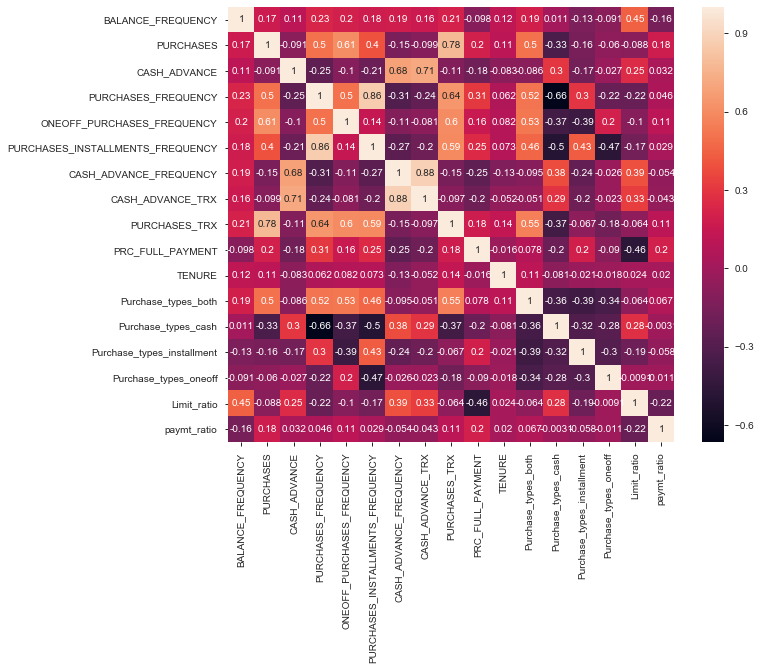

In [27]:
plt.figure(figsize = (10, 8))
sns.heatmap(credit_seg_new.corr(),annot=True)
plt.show()

In [28]:
credit_seg_new.columns

Index(['BALANCE_FREQUENCY', 'PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'PRC_FULL_PAYMENT', 'TENURE', 'Purchase_types_both',
       'Purchase_types_cash', 'Purchase_types_installment',
       'Purchase_types_oneoff', 'Limit_ratio', 'paymt_ratio'],
      dtype='object')

#### Standardizing tha data 

In [29]:
sc=StandardScaler()

credit_scaled=sc.fit_transform(credit_seg_new)

In [30]:
pd.DataFrame(credit_scaled).head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.255968,-0.551327,-0.527079,-0.806490,-0.678661,-0.707313,-0.685371,-0.557505,-0.579714,-0.525551,0.36068,-0.670193,-0.543690,1.720516,-0.514625,-0.979686,-0.268383
1,0.132501,-0.613881,3.101370,-1.221758,-0.678661,-0.916995,0.593147,0.166685,-0.675130,0.234227,0.36068,-0.670193,1.839282,-0.581221,-0.514625,0.205564,-0.111512
2,0.520970,-0.106917,-0.527079,1.269843,2.673451,-0.916995,-0.685371,-0.557505,-0.102638,-0.525551,0.36068,-0.670193,-0.543690,-0.581221,1.943162,-0.149528,-0.298365
3,-1.032906,0.369006,-0.411186,-1.014125,-0.399319,-0.916995,-0.259200,-0.376457,-0.627422,-0.525551,0.36068,-0.670193,-0.543690,-0.581221,1.943162,-0.463808,-0.363736
4,0.520970,-0.603389,-0.527079,-1.014125,-0.399319,-0.916995,-0.685371,-0.557505,-0.627422,-0.525551,0.36068,-0.670193,-0.543690,-0.581221,1.943162,0.842675,-0.181068
5,0.520970,0.260344,-0.527079,0.439310,-0.678661,0.550784,-0.685371,-0.557505,-0.293468,-0.525551,0.36068,-0.670193,-0.543690,1.720516,-0.514625,1.764575,-0.325397
6,0.520970,4.035657,-0.527079,1.269843,2.673451,1.599199,-0.685371,-0.557505,2.378162,2.893453,0.36068,1.492109,-0.543690,-0.581221,-0.514625,-0.963859,1.751085
7,0.520970,-0.327867,-0.527079,1.269843,-0.678661,1.599199,-0.685371,-0.557505,-0.102638,-0.525551,0.36068,-0.670193,-0.543690,1.720516,-0.514625,1.159800,-0.279599
8,0.520970,-0.049006,-0.527079,-0.391225,-0.399319,-0.287947,-0.685371,-0.557505,-0.436591,-0.525551,0.36068,1.492109,-0.543690,-0.581221,-0.514625,-0.683544,-0.218299
9,-1.421375,0.226458,-0.527079,-0.806490,-0.119974,-0.916995,-0.685371,-0.557505,-0.532007,-0.525551,0.36068,-0.670193,-0.543690,-0.581221,1.943162,-1.056680,0.401762


In [31]:
pd.DataFrame(credit_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03
mean,7.328750e-15,-1.813117e-15,-4.228126e-15,-3.716084e-16,2.021052e-15,2.353921e-16,-6.906456e-16,-6.159877e-16,2.936385e-15,-2.201566e-15,1.556446e-14,-3.752852e-15,-4.507133e-16,8.733374e-15,-2.274580e-15,-4.481207e-18,-6.182516e-17
std,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00
min,-3.363725e+00,-6.138806e-01,-5.270790e-01,-1.221758e+00,-6.786608e-01,-9.169952e-01,-6.853706e-01,-5.575046e-01,-6.751297e-01,-5.255510e-01,-4.122768e+00,-6.701925e-01,-5.436904e-01,-5.812208e-01,-5.146250e-01,-1.096032e+00,-3.637362e-01
25%,4.617444e-02,-5.878921e-01,-5.270790e-01,-1.014125e+00,-6.786608e-01,-9.169952e-01,-6.853706e-01,-5.575046e-01,-6.274220e-01,-5.255510e-01,3.606795e-01,-6.701925e-01,-5.436904e-01,-5.812208e-01,-5.146250e-01,-9.781225e-01,-3.038358e-01
50%,5.209700e-01,-3.769912e-01,-5.270790e-01,2.404259e-02,-3.993193e-01,-4.976286e-01,-6.853706e-01,-5.575046e-01,-3.411760e-01,-5.255510e-01,3.606795e-01,-6.701925e-01,-5.436904e-01,-5.812208e-01,-5.146250e-01,-2.368726e-01,-2.310324e-01
75%,5.209700e-01,1.140258e-01,1.001874e-01,1.062211e+00,3.269728e-01,9.701506e-01,4.510881e-01,1.666850e-01,1.359008e-01,-3.712234e-02,3.606795e-01,1.492109e+00,-5.436904e-01,1.720516e+00,-5.146250e-01,9.189450e-01,3.221991e-02
max,5.209700e-01,5.272481e+00,4.872650e+00,1.269843e+00,2.673451e+00,1.599199e+00,3.576352e+00,4.692870e+00,4.883292e+00,2.893453e+00,3.606795e-01,1.492109e+00,1.839282e+00,1.720516e+00,1.943162e+00,4.689670e+00,4.558276e+01


# PCA

In [32]:
pc = PCA(n_components=17)

In [33]:
pc.fit(credit_scaled)

PCA(copy=True, iterated_power='auto', n_components=17, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [34]:
pc.explained_variance_  #Eigen value

array([4.78182864e+00, 2.86953899e+00, 1.89095015e+00, 1.49487749e+00,
       1.19896702e+00, 9.68589652e-01, 7.99143600e-01, 7.63054828e-01,
       6.27091143e-01, 3.88990572e-01, 3.49552597e-01, 3.10125739e-01,
       2.55578111e-01, 1.63413519e-01, 1.05969956e-01, 3.42276480e-02,
       1.30452318e-31])

In [35]:
sum(pc.explained_variance_)

17.001899653592574

In [36]:
#The amount of variance that each PC explains
var= pc.explained_variance_ratio_
var

array([2.81252609e-01, 1.68777551e-01, 1.11219933e-01, 8.79241452e-02,
       7.05195914e-02, 5.69694959e-02, 4.70031947e-02, 4.48805630e-02,
       3.68835928e-02, 2.28792417e-02, 2.05596201e-02, 1.82406522e-02,
       1.50323268e-02, 9.61148589e-03, 6.23283033e-03, 2.01316610e-03,
       7.67280836e-33])

In [37]:
#Cumulative Variance explains
var1=np.cumsum(np.round(pc.explained_variance_ratio_, decimals=4)*100)
var1

array([ 28.13,  45.01,  56.13,  64.92,  71.97,  77.67,  82.37,  86.86,
        90.55,  92.84,  94.9 ,  96.72,  98.22,  99.18,  99.8 , 100.  ,
       100.  ])

In [38]:
pd.DataFrame({'Eigen_value': pc.explained_variance_, 'Cumm_variance':var1}, index=range(1,18)).round(4)

,Eigen_value,Cumm_variance
1,4.7818,28.13
2,2.8695,45.01
3,1.8910,56.13
4,1.4949,64.92
5,1.1990,71.97
6,0.9686,77.67
7,0.7991,82.37
8,0.7631,86.86
9,0.6271,90.55
10,0.3890,92.84


#### we chose 6 components as 77 % variance is explained by it.

In [39]:
pc_final=PCA(n_components=6).fit(credit_scaled)

In [40]:
pc_final.explained_variance_

array([4.78182864, 2.86953899, 1.89095015, 1.49487749, 1.19896702,
       0.96858965])

In [41]:
reduced_cr=pc_final.fit_transform(credit_scaled)  # the out put is Factors (F1, F2, ...F9)

In [42]:
dimensions = pd.DataFrame(reduced_cr)

In [43]:
dimensions.columns = ["C1", "C2", "C3", "C4", "C5", "C6"]

In [44]:
dimensions.head()

,C1,C2,C3,C4,C5,C6
0,-0.476514,-2.205673,-0.627996,-0.400280,-0.084198,0.493510
1,-3.005589,0.908485,-0.443763,1.053702,0.847751,0.572989
2,0.966181,0.124703,2.591733,-1.266947,-1.477335,0.242304
3,-0.991244,-1.196210,2.080660,-0.390123,-0.843420,0.386507
4,-1.258435,-0.824613,1.718076,-1.708859,-0.707558,0.504824


#### new variables

In [45]:
#selected the list variables from PCA based on factor loading matrics
list_var1 = ['BALANCE_FREQUENCY', 'PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'PRC_FULL_PAYMENT', 'TENURE', 'Purchase_types_both',
       'Purchase_types_cash', 'Purchase_types_installment',
       'Purchase_types_oneoff', 'Limit_ratio', 'paymt_ratio']

#### standardizing data

In [46]:
credit_scaled1=pd.DataFrame(credit_scaled, columns=credit_seg_new.columns)
credit_scaled1.head(5)

credit_scaled2=credit_scaled1[list_var1]
credit_scaled2.head(10)

,BALANCE_FREQUENCY,PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,PRC_FULL_PAYMENT,TENURE,Purchase_types_both,Purchase_types_cash,Purchase_types_installment,Purchase_types_oneoff,Limit_ratio,paymt_ratio
0,-0.255968,-0.551327,-0.527079,-0.806490,-0.678661,-0.707313,-0.685371,-0.557505,-0.579714,-0.525551,0.36068,-0.670193,-0.543690,1.720516,-0.514625,-0.979686,-0.268383
1,0.132501,-0.613881,3.101370,-1.221758,-0.678661,-0.916995,0.593147,0.166685,-0.675130,0.234227,0.36068,-0.670193,1.839282,-0.581221,-0.514625,0.205564,-0.111512
2,0.520970,-0.106917,-0.527079,1.269843,2.673451,-0.916995,-0.685371,-0.557505,-0.102638,-0.525551,0.36068,-0.670193,-0.543690,-0.581221,1.943162,-0.149528,-0.298365
3,-1.032906,0.369006,-0.411186,-1.014125,-0.399319,-0.916995,-0.259200,-0.376457,-0.627422,-0.525551,0.36068,-0.670193,-0.543690,-0.581221,1.943162,-0.463808,-0.363736
4,0.520970,-0.603389,-0.527079,-1.014125,-0.399319,-0.916995,-0.685371,-0.557505,-0.627422,-0.525551,0.36068,-0.670193,-0.543690,-0.581221,1.943162,0.842675,-0.181068
5,0.520970,0.260344,-0.527079,0.439310,-0.678661,0.550784,-0.685371,-0.557505,-0.293468,-0.525551,0.36068,-0.670193,-0.543690,1.720516,-0.514625,1.764575,-0.325397
6,0.520970,4.035657,-0.527079,1.269843,2.673451,1.599199,-0.685371,-0.557505,2.378162,2.893453,0.36068,1.492109,-0.543690,-0.581221,-0.514625,-0.963859,1.751085
7,0.520970,-0.327867,-0.527079,1.269843,-0.678661,1.599199,-0.685371,-0.557505,-0.102638,-0.525551,0.36068,-0.670193,-0.543690,1.720516,-0.514625,1.159800,-0.279599
8,0.520970,-0.049006,-0.527079,-0.391225,-0.399319,-0.287947,-0.685371,-0.557505,-0.436591,-0.525551,0.36068,1.492109,-0.543690,-0.581221,-0.514625,-0.683544,-0.218299
9,-1.421375,0.226458,-0.527079,-0.806490,-0.119974,-0.916995,-0.685371,-0.557505,-0.532007,-0.525551,0.36068,-0.670193,-0.543690,-0.581221,1.943162,-1.056680,0.401762


##### 3 cluster solution

In [47]:
km_3=KMeans(n_clusters=3,random_state=123)
#KMeans?

In [48]:
km_3.fit(credit_scaled2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

In [49]:
km_3.labels_

array([2, 1, 0, ..., 2, 1, 1])

In [50]:
km_3.cluster_centers_

array([[ 0.3073132 ,  0.81182977, -0.22627468,  0.84609046,  0.97648109,
         0.58967189, -0.26134186, -0.19877872,  0.8451602 ,  0.2010727 ,
         0.19073496,  1.27304702, -0.54369045, -0.5780482 , -0.26901564,
        -0.15315494,  0.12742879],
       [-0.08777619, -0.4561401 ,  0.38139817, -0.93931427, -0.35025263,
        -0.87704605,  0.47496233,  0.38977544, -0.57133745, -0.36059844,
        -0.11989683, -0.57848905,  0.71465698, -0.53538845,  0.49213357,
         0.32428916, -0.04030881],
       [-0.25327481, -0.27145173, -0.37515708,  0.53964868, -0.67827657,
         0.77043064, -0.4943903 , -0.42659596, -0.11155113,  0.37181164,
        -0.04120671, -0.66820968, -0.54369045,  1.71840577, -0.514625  ,
        -0.37119236, -0.09808537]])

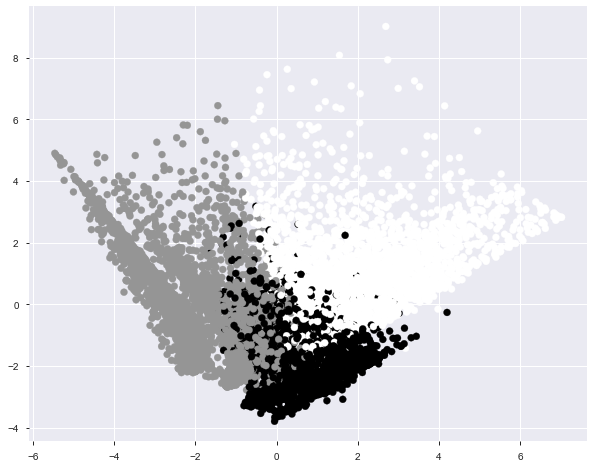

In [51]:
plt.figure(figsize=(10, 8))
plt.scatter(reduced_cr[:,0], reduced_cr[:,1], c=km_3.labels_.astype(float))

##### cluster 4,5,6,7,8 solution

In [52]:
km_4=KMeans(n_clusters=4,random_state=123).fit(credit_scaled2)
#km_5.labels_a

km_5=KMeans(n_clusters=5,random_state=123).fit(credit_scaled2)
#km_5.labels_

km_6=KMeans(n_clusters=6,random_state=123).fit(credit_scaled2)
#km_6.labels_

km_7=KMeans(n_clusters=7,random_state=123).fit(credit_scaled2)
#km_7.labels_

km_8=KMeans(n_clusters=8,random_state=123).fit(credit_scaled2)
#km_5.labels_

In [53]:
credit_seg_new['cluster_3'] = km_3.labels_
credit_seg_new['cluster_4'] = km_4.labels_
credit_seg_new['cluster_5'] = km_5.labels_
credit_seg_new['cluster_6'] = km_6.labels_
credit_seg_new['cluster_7'] = km_7.labels_
credit_seg_new['cluster_8'] = km_8.labels_

In [54]:
credit_seg_new.head(10)

,BALANCE_FREQUENCY,PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,PRC_FULL_PAYMENT,...,Purchase_types_installment,Purchase_types_oneoff,Limit_ratio,paymt_ratio,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8
0,0.818182,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2.0,0.000000,...,1,0,4.090075,144.650844,2,0,2,3,1,2
1,0.909091,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0.0,0.222222,...,0,0,45.749535,382.624146,1,1,1,5,5,1
2,1.000000,773.17,0.000000,1.000000,1.000000,0.000000,0.000000,0,12.0,0.000000,...,0,1,33.268651,99.168154,0,3,0,1,6,5
3,0.636364,1499.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1.0,0.000000,...,0,1,22.222274,0.000000,1,3,0,1,6,5
4,1.000000,16.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1.0,0.000000,...,0,1,68.142861,277.107453,1,3,0,1,6,5
5,1.000000,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8.0,0.000000,...,1,0,100.546042,58.160144,2,0,2,3,1,2
6,1.000000,7091.01,0.000000,1.000000,1.000000,1.000000,0.000000,0,64.0,1.000000,...,0,0,4.646376,3208.181984,0,2,4,0,3,0
7,1.000000,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12.0,0.000000,...,1,0,79.289250,127.635658,2,0,2,3,1,2
8,1.000000,861.49,0.000000,0.333333,0.083333,0.250000,0.000000,0,5.0,0.000000,...,0,0,14.498950,220.627980,0,2,4,2,2,6
9,0.545455,1281.60,0.000000,0.166667,0.166667,0.000000,0.000000,0,3.0,0.000000,...,0,1,1.383873,1161.260542,1,3,0,1,6,5


In [55]:
pd.Series(km_3.labels_).value_counts()/sum(pd.Series(km_3.labels_).value_counts())

1    0.432179
0    0.324134
2    0.243687
dtype: float64

In [56]:
pd.Series(km_4.labels_).value_counts()/sum(pd.Series(km_4.labels_).value_counts())

2    0.298101
1    0.260223
0    0.243911
3    0.197765
dtype: float64

In [57]:
pd.Series(km_5.labels_).value_counts()/sum(pd.Series(km_5.labels_).value_counts())

4    0.281788
2    0.242235
1    0.203240
0    0.188939
3    0.083799
dtype: float64

In [58]:
pd.Series(km_6.labels_).value_counts()/sum(pd.Series(km_6.labels_).value_counts())

3    0.242011
2    0.211061
5    0.201453
1    0.185698
4    0.080335
0    0.079441
dtype: float64

In [59]:
pd.Series(km_7.labels_).value_counts()/sum(pd.Series(km_7.labels_).value_counts())

2    0.208268
5    0.201341
6    0.186145
4    0.124469
1    0.121453
3    0.080000
0    0.078324
dtype: float64

### Silhoutee Coeficient

In [60]:
# calculate SC for K=3
from sklearn import metrics
metrics.silhouette_score(credit_scaled2, km_8.labels_)

0.27852264971014284

In [61]:
# calculate SC for K=3 through K=12
k_range = range(3,9)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=123)
    km.fit(credit_scaled2)
    scores.append(metrics.silhouette_score(credit_scaled2, km.labels_))

In [62]:
scores

[0.23401064991953133,
 0.273921821826951,
 0.28745283195509796,
 0.28098283738239704,
 0.2611496594594148,
 0.27852264971014284]

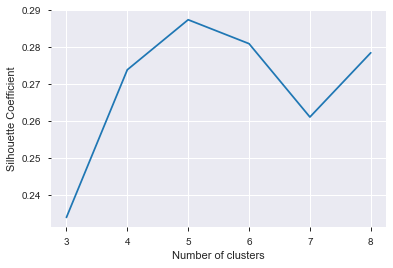

In [63]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

## Elbow Analysis

In [64]:
cluster_range = range( 3,9 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( credit_scaled2 )
    cluster_errors.append( clusters.inertia_ )

In [65]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

clusters_df[0:10]

,num_clusters,cluster_errors
0,3,103470.382523
1,4,89275.346965
2,5,80826.755753
3,6,73682.465287
4,7,69329.989208
5,8,66027.039577


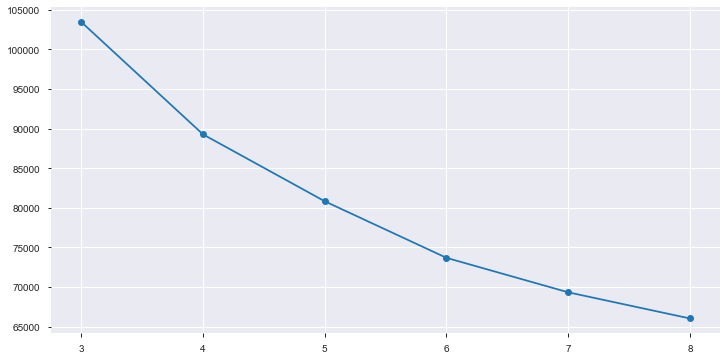

In [66]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [67]:
C5=pd.concat([credit_scaled2,pd.Series(km_5.labels_,name='cluster_5')],axis=1)

In [68]:
# Mean value of each variable group by Cluster- 6
cluster_5_output=C5.groupby('cluster_5').apply(lambda x: x[list_var1].mean()).T
cluster_5_output

cluster_5,0,1,2,3,4
BALANCE_FREQUENCY,-0.262904,-0.022549,-0.259293,0.394302,0.298179
PURCHASES,-0.140433,-0.613228,-0.277580,-0.157418,0.821883
CASH_ADVANCE,-0.277207,0.300916,-0.400286,2.188719,-0.337957
PURCHASES_FREQUENCY,-0.423467,-1.219095,0.524855,-0.318067,0.806614
ONEOFF_PURCHASES_FREQUENCY,0.393624,-0.677227,-0.678274,-0.063857,0.826586
PURCHASES_INSTALLMENTS_FREQUENCY,-0.914953,-0.915151,0.755953,-0.321449,0.719280
CASH_ADVANCE_FREQUENCY,-0.294150,0.471913,-0.514395,2.261679,-0.373534
CASH_ADVANCE_TRX,-0.303653,0.227399,-0.443765,2.558442,-0.339774
PURCHASES_TRX,-0.369741,-0.674343,-0.121859,-0.177028,0.891682
PRC_FULL_PAYMENT,-0.172383,-0.375771,0.374492,-0.374054,0.175920


## Profiling

In [69]:
size=pd.concat([pd.Series(credit_seg_new.cluster_3.size), pd.Series.sort_index(credit_seg_new.cluster_3.value_counts()), pd.Series.sort_index(credit_seg_new.cluster_4.value_counts()),
           pd.Series.sort_index(credit_seg_new.cluster_5.value_counts()), pd.Series.sort_index(credit_seg_new.cluster_6.value_counts()),
           pd.Series.sort_index(credit_seg_new.cluster_7.value_counts()), pd.Series.sort_index(credit_seg_new.cluster_8.value_counts())])

In [70]:
size

0    8950
0    2901
1    3868
2    2181
0    2183
1    2329
2    2668
3    1770
0    1691
1    1819
2    2168
3     750
4    2522
0     711
1    1662
2    1889
3    2166
4     719
5    1803
0     701
1    1087
2    1864
3     716
4    1114
5    1802
6    1666
0     459
1    1800
2    2165
3     542
4     703
5    1608
6    1668
7       5
dtype: int64

In [71]:
Seg_size=pd.DataFrame(size, columns=['Seg_size'])
Seg_Pct = pd.DataFrame(size/credit_seg_new.cluster_3.size, columns=['Seg_Pct'])

In [72]:
Seg_Pct.T

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
Seg_Pct,1.0,0.324134,0.432179,0.243687,0.243911,0.260223,0.298101,0.197765,0.188939,0.20324,...,0.201341,0.186145,0.051285,0.201117,0.241899,0.060559,0.078547,0.179665,0.186369,0.000559


In [73]:
pd.concat([Seg_size.T, Seg_Pct.T], axis=0)

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
Seg_size,8950.0,2901.000000,3868.000000,2181.000000,2183.000000,2329.000000,2668.000000,1770.000000,1691.000000,1819.00000,...,1802.000000,1666.000000,459.000000,1800.000000,2165.000000,542.000000,703.000000,1608.000000,1668.000000,5.000000
Seg_Pct,1.0,0.324134,0.432179,0.243687,0.243911,0.260223,0.298101,0.197765,0.188939,0.20324,...,0.201341,0.186145,0.051285,0.201117,0.241899,0.060559,0.078547,0.179665,0.186369,0.000559


In [74]:
credit_seg_new.head(10)

,BALANCE_FREQUENCY,PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,PRC_FULL_PAYMENT,...,Purchase_types_installment,Purchase_types_oneoff,Limit_ratio,paymt_ratio,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8
0,0.818182,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2.0,0.000000,...,1,0,4.090075,144.650844,2,0,2,3,1,2
1,0.909091,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0.0,0.222222,...,0,0,45.749535,382.624146,1,1,1,5,5,1
2,1.000000,773.17,0.000000,1.000000,1.000000,0.000000,0.000000,0,12.0,0.000000,...,0,1,33.268651,99.168154,0,3,0,1,6,5
3,0.636364,1499.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1.0,0.000000,...,0,1,22.222274,0.000000,1,3,0,1,6,5
4,1.000000,16.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1.0,0.000000,...,0,1,68.142861,277.107453,1,3,0,1,6,5
5,1.000000,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8.0,0.000000,...,1,0,100.546042,58.160144,2,0,2,3,1,2
6,1.000000,7091.01,0.000000,1.000000,1.000000,1.000000,0.000000,0,64.0,1.000000,...,0,0,4.646376,3208.181984,0,2,4,0,3,0
7,1.000000,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12.0,0.000000,...,1,0,79.289250,127.635658,2,0,2,3,1,2
8,1.000000,861.49,0.000000,0.333333,0.083333,0.250000,0.000000,0,5.0,0.000000,...,0,0,14.498950,220.627980,0,2,4,2,2,6
9,0.545455,1281.60,0.000000,0.166667,0.166667,0.000000,0.000000,0,3.0,0.000000,...,0,1,1.383873,1161.260542,1,3,0,1,6,5


In [75]:
# Mean value gives a good indication of the distribution of data. So we are finding mean value for each variable for each cluster
Profling_output = pd.concat([credit_seg_new.apply(lambda x: x.mean()).T, credit_seg_new.groupby('cluster_3').apply(lambda x: x.mean()).T, credit_seg_new.groupby('cluster_4').apply(lambda x: x.mean()).T,
        credit_seg_new.groupby('cluster_5').apply(lambda x: x.mean()).T, credit_seg_new.groupby('cluster_6').apply(lambda x: x.mean()).T,
          credit_seg_new.groupby('cluster_7').apply(lambda x: x.mean()).T, credit_seg_new.groupby('cluster_8').apply(lambda x: x.mean()).T], axis=1)


In [76]:
Profling_output

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
BALANCE_FREQUENCY,0.878083,0.949983,0.857579,0.818812,0.818125,0.893586,0.950434,0.822576,0.816559,0.872806,...,0.872021,0.820091,0.992236,0.873759,0.817956,0.915455,0.968622,0.816231,0.940139,0.400000
PURCHASES,936.229237,2174.768307,240.756789,522.238216,519.727888,60.994277,2184.353358,720.212011,722.055038,0.995250,...,0.000000,681.257083,5567.515251,0.119633,508.822827,2159.265886,605.793073,646.005715,1250.552794,210.304000
CASH_ADVANCE,935.920972,534.314805,1612.743091,269.763951,249.795823,2263.272686,573.037836,582.577055,443.691135,1470.250756,...,1453.437157,457.303766,565.480188,1443.526777,226.569367,73.616722,4966.432594,474.855489,427.137931,4146.069282
PURCHASES_FREQUENCY,0.490351,0.829984,0.113501,0.706938,0.703828,0.043016,0.817947,0.321873,0.320393,0.001069,...,0.000185,0.316064,0.976309,0.000478,0.701086,0.876863,0.338849,0.295664,0.738550,0.200000
ONEOFF_PURCHASES_FREQUENCY,0.202458,0.493701,0.098118,0.000115,0.000210,0.017825,0.450245,0.321339,0.319883,0.000428,...,0.000000,0.315864,0.761715,0.000000,0.000000,0.614151,0.172927,0.295456,0.319397,0.016667
PURCHASES_INSTALLMENTS_FREQUENCY,0.364437,0.598994,0.015873,0.670626,0.667397,0.025568,0.653560,0.000870,0.000812,0.000733,...,0.000185,0.000000,0.849677,0.000478,0.665024,0.558849,0.215916,0.000000,0.584766,0.200000
CASH_ADVANCE_FREQUENCY,0.134017,0.082943,0.226832,0.037344,0.036356,0.307212,0.088775,0.094767,0.076499,0.226294,...,0.225643,0.078261,0.076905,0.226171,0.033517,0.012917,0.585235,0.081098,0.081025,0.100000
CASH_ADVANCE_TRX,3.079330,1.982075,5.230869,0.723063,0.699496,7.306140,2.127061,1.888136,1.402129,4.335349,...,4.294118,1.445978,1.934641,4.296667,0.625866,0.241697,17.586060,1.504353,1.596523,1.400000
PURCHASES_TRX,14.151385,31.872248,2.179162,11.813164,11.709350,0.811936,32.896882,6.459610,6.401248,0.016493,...,0.001665,6.207989,80.016057,0.005000,11.559589,28.788764,9.133713,5.778302,20.119904,3.200000
PRC_FULL_PAYMENT,0.153715,0.212598,0.048233,0.262463,0.263142,0.042305,0.196124,0.101423,0.103295,0.043808,...,0.044110,0.098284,0.203170,0.043088,0.262226,0.762478,0.043989,0.067669,0.050103,0.128571


In [77]:
Profling_output_final=pd.concat([Seg_size.T, Seg_Pct.T, Profling_output], axis=0)

In [78]:
Profling_output_final

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
Seg_size,8950.000000,2901.000000,3868.000000,2181.000000,2183.000000,2329.000000,2668.000000,1770.000000,1691.000000,1819.000000,...,1802.000000,1666.000000,459.000000,1800.000000,2165.000000,542.000000,703.000000,1608.000000,1668.000000,5.000000
Seg_Pct,1.000000,0.324134,0.432179,0.243687,0.243911,0.260223,0.298101,0.197765,0.188939,0.203240,...,0.201341,0.186145,0.051285,0.201117,0.241899,0.060559,0.078547,0.179665,0.186369,0.000559
BALANCE_FREQUENCY,0.878083,0.949983,0.857579,0.818812,0.818125,0.893586,0.950434,0.822576,0.816559,0.872806,...,0.872021,0.820091,0.992236,0.873759,0.817956,0.915455,0.968622,0.816231,0.940139,0.400000
PURCHASES,936.229237,2174.768307,240.756789,522.238216,519.727888,60.994277,2184.353358,720.212011,722.055038,0.995250,...,0.000000,681.257083,5567.515251,0.119633,508.822827,2159.265886,605.793073,646.005715,1250.552794,210.304000
CASH_ADVANCE,935.920972,534.314805,1612.743091,269.763951,249.795823,2263.272686,573.037836,582.577055,443.691135,1470.250756,...,1453.437157,457.303766,565.480188,1443.526777,226.569367,73.616722,4966.432594,474.855489,427.137931,4146.069282
PURCHASES_FREQUENCY,0.490351,0.829984,0.113501,0.706938,0.703828,0.043016,0.817947,0.321873,0.320393,0.001069,...,0.000185,0.316064,0.976309,0.000478,0.701086,0.876863,0.338849,0.295664,0.738550,0.200000
ONEOFF_PURCHASES_FREQUENCY,0.202458,0.493701,0.098118,0.000115,0.000210,0.017825,0.450245,0.321339,0.319883,0.000428,...,0.000000,0.315864,0.761715,0.000000,0.000000,0.614151,0.172927,0.295456,0.319397,0.016667
PURCHASES_INSTALLMENTS_FREQUENCY,0.364437,0.598994,0.015873,0.670626,0.667397,0.025568,0.653560,0.000870,0.000812,0.000733,...,0.000185,0.000000,0.849677,0.000478,0.665024,0.558849,0.215916,0.000000,0.584766,0.200000
CASH_ADVANCE_FREQUENCY,0.134017,0.082943,0.226832,0.037344,0.036356,0.307212,0.088775,0.094767,0.076499,0.226294,...,0.225643,0.078261,0.076905,0.226171,0.033517,0.012917,0.585235,0.081098,0.081025,0.100000
CASH_ADVANCE_TRX,3.079330,1.982075,5.230869,0.723063,0.699496,7.306140,2.127061,1.888136,1.402129,4.335349,...,4.294118,1.445978,1.934641,4.296667,0.625866,0.241697,17.586060,1.504353,1.596523,1.400000


In [79]:
#Profling_output_final.columns = ['Seg_' + str(i) for i in Profling_output_final.columns]
Profling_output_final.columns = ['Overall', 'KM3_1', 'KM3_2', 'KM3_3',
                                'KM4_1', 'KM4_2', 'KM4_3', 'KM4_4',
                                'KM5_1', 'KM5_2', 'KM5_3', 'KM5_4', 'KM5_5',
                                'KM6_1', 'KM6_2', 'KM6_3', 'KM6_4', 'KM6_5','KM6_6',
                                'KM7_1', 'KM7_2', 'KM7_3', 'KM7_4', 'KM7_5','KM7_6','KM7_7',
                                'KM8_1', 'KM8_2', 'KM8_3', 'KM8_4', 'KM8_5','KM8_6','KM8_7','KM8_8',]

In [80]:
Profling_output_final

,Overall,KM3_1,KM3_2,KM3_3,KM4_1,KM4_2,KM4_3,KM4_4,KM5_1,KM5_2,...,KM7_6,KM7_7,KM8_1,KM8_2,KM8_3,KM8_4,KM8_5,KM8_6,KM8_7,KM8_8
Seg_size,8950.000000,2901.000000,3868.000000,2181.000000,2183.000000,2329.000000,2668.000000,1770.000000,1691.000000,1819.000000,...,1802.000000,1666.000000,459.000000,1800.000000,2165.000000,542.000000,703.000000,1608.000000,1668.000000,5.000000
Seg_Pct,1.000000,0.324134,0.432179,0.243687,0.243911,0.260223,0.298101,0.197765,0.188939,0.203240,...,0.201341,0.186145,0.051285,0.201117,0.241899,0.060559,0.078547,0.179665,0.186369,0.000559
BALANCE_FREQUENCY,0.878083,0.949983,0.857579,0.818812,0.818125,0.893586,0.950434,0.822576,0.816559,0.872806,...,0.872021,0.820091,0.992236,0.873759,0.817956,0.915455,0.968622,0.816231,0.940139,0.400000
PURCHASES,936.229237,2174.768307,240.756789,522.238216,519.727888,60.994277,2184.353358,720.212011,722.055038,0.995250,...,0.000000,681.257083,5567.515251,0.119633,508.822827,2159.265886,605.793073,646.005715,1250.552794,210.304000
CASH_ADVANCE,935.920972,534.314805,1612.743091,269.763951,249.795823,2263.272686,573.037836,582.577055,443.691135,1470.250756,...,1453.437157,457.303766,565.480188,1443.526777,226.569367,73.616722,4966.432594,474.855489,427.137931,4146.069282
PURCHASES_FREQUENCY,0.490351,0.829984,0.113501,0.706938,0.703828,0.043016,0.817947,0.321873,0.320393,0.001069,...,0.000185,0.316064,0.976309,0.000478,0.701086,0.876863,0.338849,0.295664,0.738550,0.200000
ONEOFF_PURCHASES_FREQUENCY,0.202458,0.493701,0.098118,0.000115,0.000210,0.017825,0.450245,0.321339,0.319883,0.000428,...,0.000000,0.315864,0.761715,0.000000,0.000000,0.614151,0.172927,0.295456,0.319397,0.016667
PURCHASES_INSTALLMENTS_FREQUENCY,0.364437,0.598994,0.015873,0.670626,0.667397,0.025568,0.653560,0.000870,0.000812,0.000733,...,0.000185,0.000000,0.849677,0.000478,0.665024,0.558849,0.215916,0.000000,0.584766,0.200000
CASH_ADVANCE_FREQUENCY,0.134017,0.082943,0.226832,0.037344,0.036356,0.307212,0.088775,0.094767,0.076499,0.226294,...,0.225643,0.078261,0.076905,0.226171,0.033517,0.012917,0.585235,0.081098,0.081025,0.100000
CASH_ADVANCE_TRX,3.079330,1.982075,5.230869,0.723063,0.699496,7.306140,2.127061,1.888136,1.402129,4.335349,...,4.294118,1.445978,1.934641,4.296667,0.625866,0.241697,17.586060,1.504353,1.596523,1.400000


In [81]:
#Profling_output_final.to_csv('Profiling_output.csv')

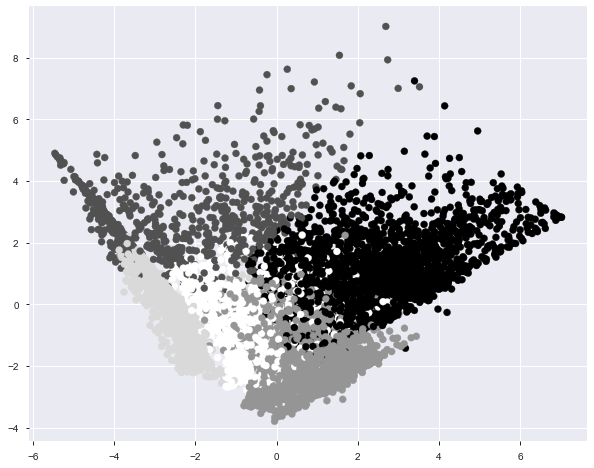

In [82]:
plt.figure(figsize=(10, 8))
plt.scatter(reduced_cr[:,0], reduced_cr[:,1], c=km_5.labels_.astype(float))

#### Based on Silhoutee coeficient and profiling we chose 5 clusters

## Factor Analysis 

In [83]:
credit_seg_new.columns

Index(['BALANCE_FREQUENCY', 'PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'PRC_FULL_PAYMENT', 'TENURE', 'Purchase_types_both',
       'Purchase_types_cash', 'Purchase_types_installment',
       'Purchase_types_oneoff', 'Limit_ratio', 'paymt_ratio', 'cluster_3',
       'cluster_4', 'cluster_5', 'cluster_6', 'cluster_7', 'cluster_8'],
      dtype='object')

#### Standardizing tha data 

In [84]:
sc=StandardScaler()

credit_scaled=sc.fit_transform(credit_seg_new)

In [122]:
pd.DataFrame(credit_scaled).head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.255968,-0.551327,-0.527079,-0.806490,-0.678661,-0.707313,-0.685371,-0.557505,-0.579714,-0.525551,0.36068,-0.670193,-0.543690,1.720516,-0.514625,-0.979686,-0.268383
1,0.132501,-0.613881,3.101370,-1.221758,-0.678661,-0.916995,0.593147,0.166685,-0.675130,0.234227,0.36068,-0.670193,1.839282,-0.581221,-0.514625,0.205564,-0.111512
2,0.520970,-0.106917,-0.527079,1.269843,2.673451,-0.916995,-0.685371,-0.557505,-0.102638,-0.525551,0.36068,-0.670193,-0.543690,-0.581221,1.943162,-0.149528,-0.298365
3,-1.032906,0.369006,-0.411186,-1.014125,-0.399319,-0.916995,-0.259200,-0.376457,-0.627422,-0.525551,0.36068,-0.670193,-0.543690,-0.581221,1.943162,-0.463808,-0.363736
4,0.520970,-0.603389,-0.527079,-1.014125,-0.399319,-0.916995,-0.685371,-0.557505,-0.627422,-0.525551,0.36068,-0.670193,-0.543690,-0.581221,1.943162,0.842675,-0.181068
5,0.520970,0.260344,-0.527079,0.439310,-0.678661,0.550784,-0.685371,-0.557505,-0.293468,-0.525551,0.36068,-0.670193,-0.543690,1.720516,-0.514625,1.764575,-0.325397
6,0.520970,4.035657,-0.527079,1.269843,2.673451,1.599199,-0.685371,-0.557505,2.378162,2.893453,0.36068,1.492109,-0.543690,-0.581221,-0.514625,-0.963859,1.751085
7,0.520970,-0.327867,-0.527079,1.269843,-0.678661,1.599199,-0.685371,-0.557505,-0.102638,-0.525551,0.36068,-0.670193,-0.543690,1.720516,-0.514625,1.159800,-0.279599
8,0.520970,-0.049006,-0.527079,-0.391225,-0.399319,-0.287947,-0.685371,-0.557505,-0.436591,-0.525551,0.36068,1.492109,-0.543690,-0.581221,-0.514625,-0.683544,-0.218299
9,-1.421375,0.226458,-0.527079,-0.806490,-0.119974,-0.916995,-0.685371,-0.557505,-0.532007,-0.525551,0.36068,-0.670193,-0.543690,-0.581221,1.943162,-1.056680,0.401762


In [123]:
pd.DataFrame(credit_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03
mean,7.328750e-15,-1.813117e-15,-4.228126e-15,-3.716084e-16,2.021052e-15,2.353921e-16,-6.906456e-16,-6.159877e-16,2.936385e-15,-2.201566e-15,1.556446e-14,-3.752852e-15,-4.507133e-16,8.733374e-15,-2.274580e-15,-4.481207e-18,-6.182516e-17
std,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00
min,-3.363725e+00,-6.138806e-01,-5.270790e-01,-1.221758e+00,-6.786608e-01,-9.169952e-01,-6.853706e-01,-5.575046e-01,-6.751297e-01,-5.255510e-01,-4.122768e+00,-6.701925e-01,-5.436904e-01,-5.812208e-01,-5.146250e-01,-1.096032e+00,-3.637362e-01
25%,4.617444e-02,-5.878921e-01,-5.270790e-01,-1.014125e+00,-6.786608e-01,-9.169952e-01,-6.853706e-01,-5.575046e-01,-6.274220e-01,-5.255510e-01,3.606795e-01,-6.701925e-01,-5.436904e-01,-5.812208e-01,-5.146250e-01,-9.781225e-01,-3.038358e-01
50%,5.209700e-01,-3.769912e-01,-5.270790e-01,2.404259e-02,-3.993193e-01,-4.976286e-01,-6.853706e-01,-5.575046e-01,-3.411760e-01,-5.255510e-01,3.606795e-01,-6.701925e-01,-5.436904e-01,-5.812208e-01,-5.146250e-01,-2.368726e-01,-2.310324e-01
75%,5.209700e-01,1.140258e-01,1.001874e-01,1.062211e+00,3.269728e-01,9.701506e-01,4.510881e-01,1.666850e-01,1.359008e-01,-3.712234e-02,3.606795e-01,1.492109e+00,-5.436904e-01,1.720516e+00,-5.146250e-01,9.189450e-01,3.221991e-02
max,5.209700e-01,5.272481e+00,4.872650e+00,1.269843e+00,2.673451e+00,1.599199e+00,3.576352e+00,4.692870e+00,4.883292e+00,2.893453e+00,3.606795e-01,1.492109e+00,1.839282e+00,1.720516e+00,1.943162e+00,4.689670e+00,4.558276e+01


In [124]:
corrl=pd.DataFrame(credit_scaled).corr()
corrl

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1.000000,0.170515,0.107785,0.232890,0.202845,0.179472,0.193894,0.162818,0.212610,-0.098040,0.121525,0.194377,0.010821,-0.132176,-0.090963,0.447095,-0.162066
1,0.170515,1.000000,-0.091164,0.504218,0.608351,0.400843,-0.149419,-0.099497,0.780817,0.202887,0.107263,0.502341,-0.333761,-0.156000,-0.060172,-0.088140,0.175943
2,0.107785,-0.091164,1.000000,-0.249835,-0.104954,-0.207395,0.683400,0.710309,-0.112613,-0.179068,-0.083485,-0.085792,0.301416,-0.174898,-0.026607,0.254374,0.032403
3,0.232890,0.504218,-0.249835,1.000000,0.501343,0.862934,-0.312493,-0.238395,0.642234,0.305802,0.061506,0.515593,-0.664037,0.295918,-0.217147,-0.217578,0.045635
4,0.202845,0.608351,-0.104954,0.501343,1.000000,0.142329,-0.113575,-0.081339,0.601289,0.157531,0.082466,0.525795,-0.368981,-0.394452,0.204113,-0.099701,0.107096
5,0.179472,0.400843,-0.207395,0.862934,0.142329,1.000000,-0.265907,-0.200169,0.593674,0.250087,0.073275,0.463390,-0.498338,0.430024,-0.471909,-0.174508,0.029228
6,0.193894,-0.149419,0.683400,-0.312493,-0.113575,-0.265907,1.000000,0.881092,-0.151307,-0.253292,-0.129136,-0.095419,0.379269,-0.240403,-0.026016,0.391003,-0.054092
7,0.162818,-0.099497,0.710309,-0.238395,-0.081339,-0.200169,0.881092,1.000000,-0.096709,-0.201056,-0.051821,-0.051092,0.285854,-0.200506,-0.022655,0.325136,-0.042854
8,0.212610,0.780817,-0.112613,0.642234,0.601289,0.593674,-0.151307,-0.096709,1.000000,0.179559,0.135331,0.552466,-0.367023,-0.066802,-0.178086,-0.064353,0.108358
9,-0.098040,0.202887,-0.179068,0.305802,0.157531,0.250087,-0.253292,-0.201056,0.179559,1.000000,-0.016486,0.078435,-0.203263,0.197362,-0.090251,-0.462825,0.202232


In [125]:
#Calculating Eigen value table using numpy
eigen_values = np.linalg.eigvals(corrl)
eigen_values_cumvar = (eigen_values/corrl.shape[0]).cumsum()
pd.DataFrame({'Eigen_value': eigen_values, 'Cumm_variance':eigen_values_cumvar}, index=range(1,18)).round(4)

,Eigen_value,Cumm_variance
1,4.7813,0.2813
2,2.8692,0.4500
3,1.8907,0.5613
4,1.4947,0.6492
5,1.1988,0.7197
6,0.9685,0.7767
7,0.7991,0.8237
8,0.7630,0.8685
9,0.6270,0.9054
10,0.0342,0.9074


####  we will take 6 factors as the eigen value is close to 1 and explains more than 75 % of variance.  

In [127]:
fa = FactorAnalyzer(n_factors=6,rotation='varimax',method='ml').fit(credit_seg_new)

C:\Users\DELL\Anaconda3\lib\site-packages\factor_analyzer\factor_analyzer.py:536: UserWarning: Failed to converge: b'ABNORMAL_TERMINATION_IN_LNSRCH'
  warnings.warn('Failed to converge: {}'.format(res.message))


#### creating loading matrix

In [128]:
loadings=pd.DataFrame(fa.loadings_,columns=["Fctr1","Fctr2","Fctr3","Fctr4","Fctr5","Fctr6"])
loadings

,Fctr1,Fctr2,Fctr3,Fctr4,Fctr5,Fctr6
0,0.237820,0.346414,0.111867,0.116515,0.016153,-0.058243
1,-0.055891,0.335290,0.688291,0.072352,0.021136,0.154518
2,0.740125,-0.054585,-0.055566,0.018441,0.014515,-0.058978
3,-0.224444,0.776899,0.345736,-0.164757,0.082298,0.342445
4,-0.032801,0.201658,0.797192,0.238965,-0.198669,0.207472
5,-0.202852,0.825099,0.086653,-0.199606,0.318602,0.243386
6,0.911275,-0.056365,-0.090535,0.057738,0.011557,-0.077592
7,0.914908,-0.014998,-0.062021,0.023729,0.005604,0.006516
8,-0.053620,0.527122,0.639789,0.035227,0.094148,0.141506
9,-0.242366,0.127352,0.235770,-0.193422,0.055857,0.043891


In [129]:
#loadings.to_excel('FA_loading1.xls')
fa.get_factor_variance()

(array([2.7377768 , 2.16569608, 2.02622467, 1.3668783 , 1.36617067,
        1.24773235]),
 array([0.16104569, 0.12739389, 0.11918969, 0.08040461, 0.08036298,
        0.07339602]),
 array([0.16104569, 0.28843958, 0.40762927, 0.48803387, 0.56839685,
        0.64179287]))

####  new variables

In [130]:
#selected the list variables based on factor loading matrics
list_var = ['CASH_ADVANCE_TRX','CASH_ADVANCE_FREQUENCY','Limit_ratio','PRC_FULL_PAYMENT','PURCHASES_FREQUENCY','BALANCE_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY',
            'PURCHASES_TRX','paymt_ratio','TENURE','Purchase_types_both','Purchase_types_oneoff','Purchase_types_cash']


####  Standardizing  data 

In [131]:
credit_scaled1=pd.DataFrame(credit_scaled, columns=credit_seg_new.columns)
credit_scaled1.head(5)

credit_scaled2=credit_scaled1[list_var]
credit_scaled2.head(10)

,CASH_ADVANCE_TRX,CASH_ADVANCE_FREQUENCY,Limit_ratio,PRC_FULL_PAYMENT,PURCHASES_FREQUENCY,BALANCE_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_TRX,paymt_ratio,TENURE,Purchase_types_both,Purchase_types_oneoff,Purchase_types_cash
0,-0.557505,-0.685371,-0.979686,-0.525551,-0.806490,-0.255968,-0.678661,-0.579714,-0.268383,0.36068,-0.670193,-0.514625,-0.543690
1,0.166685,0.593147,0.205564,0.234227,-1.221758,0.132501,-0.678661,-0.675130,-0.111512,0.36068,-0.670193,-0.514625,1.839282
2,-0.557505,-0.685371,-0.149528,-0.525551,1.269843,0.520970,2.673451,-0.102638,-0.298365,0.36068,-0.670193,1.943162,-0.543690
3,-0.376457,-0.259200,-0.463808,-0.525551,-1.014125,-1.032906,-0.399319,-0.627422,-0.363736,0.36068,-0.670193,1.943162,-0.543690
4,-0.557505,-0.685371,0.842675,-0.525551,-1.014125,0.520970,-0.399319,-0.627422,-0.181068,0.36068,-0.670193,1.943162,-0.543690
5,-0.557505,-0.685371,1.764575,-0.525551,0.439310,0.520970,-0.678661,-0.293468,-0.325397,0.36068,-0.670193,-0.514625,-0.543690
6,-0.557505,-0.685371,-0.963859,2.893453,1.269843,0.520970,2.673451,2.378162,1.751085,0.36068,1.492109,-0.514625,-0.543690
7,-0.557505,-0.685371,1.159800,-0.525551,1.269843,0.520970,-0.678661,-0.102638,-0.279599,0.36068,-0.670193,-0.514625,-0.543690
8,-0.557505,-0.685371,-0.683544,-0.525551,-0.391225,0.520970,-0.399319,-0.436591,-0.218299,0.36068,1.492109,-0.514625,-0.543690
9,-0.557505,-0.685371,-1.056680,-0.525551,-0.806490,-1.421375,-0.119974,-0.532007,0.401762,0.36068,-0.670193,1.943162,-0.543690


# segmentation

#### 3 cluster solution 

In [132]:
km_3=KMeans(n_clusters=3,random_state=123)
#KMeans?

In [133]:
km_3.fit(credit_scaled2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

In [134]:
km_3.labels_

array([1, 2, 1, ..., 1, 2, 1])

In [135]:
km_3.cluster_centers_

array([[-0.13120714, -0.18732086, -0.04917179,  0.10946062,  0.85481871,
         0.39152114,  0.85432907,  0.95441834,  0.10379075,  0.18629487,
         1.44115351, -0.49313921, -0.54369045],
       [-0.40915924, -0.45905106, -0.32902548,  0.1836755 ,  0.08889376,
        -0.33927938, -0.20203451, -0.25712368,  0.00699193, -0.02465269,
        -0.59352307,  0.52608255, -0.52593449],
       [ 0.79837402,  0.93921216,  0.58093867, -0.41320805, -1.06922231,
         0.11964698, -0.60215141, -0.6223112 , -0.12372726, -0.16242007,
        -0.61049984, -0.30904986,  1.43279217]])

#### Cluster 4,5,7,8 Solution

In [136]:
km_4=KMeans(n_clusters=4,random_state=123).fit(credit_scaled2)
#km_5.labels_a

km_5=KMeans(n_clusters=5,random_state=123).fit(credit_scaled2)
#km_5.labels_

km_6=KMeans(n_clusters=6,random_state=123).fit(credit_scaled2)
#km_6.labels_

km_7=KMeans(n_clusters=7,random_state=123).fit(credit_scaled2)
#km_7.labels_

km_8=KMeans(n_clusters=8,random_state=123).fit(credit_scaled2)
#km_5.labels_

In [137]:
credit_seg_new['cluster_3'] = km_3.labels_
credit_seg_new['cluster_4'] = km_4.labels_
credit_seg_new['cluster_5'] = km_5.labels_
credit_seg_new['cluster_6'] = km_6.labels_
credit_seg_new['cluster_7'] = km_7.labels_
credit_seg_new['cluster_8'] = km_8.labels_

In [138]:
credit_seg_new.head(10)

,BALANCE_FREQUENCY,PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,PRC_FULL_PAYMENT,...,Purchase_types_installment,Purchase_types_oneoff,Limit_ratio,paymt_ratio,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8
0,0.818182,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2.0,0.000000,...,1,0,4.090075,144.650844,1,0,4,0,2,0
1,0.909091,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0.0,0.222222,...,0,0,45.749535,382.624146,2,3,0,1,3,7
2,1.000000,773.17,0.000000,1.000000,1.000000,0.000000,0.000000,0,12.0,0.000000,...,0,1,33.268651,99.168154,1,2,2,3,0,4
3,0.636364,1499.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1.0,0.000000,...,0,1,22.222274,0.000000,1,2,2,3,0,4
4,1.000000,16.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1.0,0.000000,...,0,1,68.142861,277.107453,1,2,2,3,0,4
5,1.000000,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8.0,0.000000,...,1,0,100.546042,58.160144,1,0,4,5,2,3
6,1.000000,7091.01,0.000000,1.000000,1.000000,1.000000,0.000000,0,64.0,1.000000,...,0,0,4.646376,3208.181984,0,1,1,2,1,6
7,1.000000,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12.0,0.000000,...,1,0,79.289250,127.635658,1,0,4,5,2,3
8,1.000000,861.49,0.000000,0.333333,0.083333,0.250000,0.000000,0,5.0,0.000000,...,0,0,14.498950,220.627980,0,0,1,5,2,3
9,0.545455,1281.60,0.000000,0.166667,0.166667,0.000000,0.000000,0,3.0,0.000000,...,0,1,1.383873,1161.260542,1,2,2,3,6,4


In [139]:
pd.Series(km_3.labels_).value_counts()/sum(pd.Series(km_3.labels_).value_counts())

1    0.434860
0    0.293966
2    0.271173
dtype: float64

In [140]:
pd.Series(km_4.labels_).value_counts()/sum(pd.Series(km_4.labels_).value_counts())

0    0.274302
1    0.273631
3    0.246257
2    0.205810
dtype: float64

In [141]:
pd.Series(km_5.labels_).value_counts()/sum(pd.Series(km_5.labels_).value_counts())

4    0.262123
1    0.259218
0    0.205363
2    0.190168
3    0.083128
dtype: float64

In [142]:
pd.Series(km_6.labels_).value_counts()/sum(pd.Series(km_6.labels_).value_counts())

5    0.242011
1    0.200447
3    0.182570
0    0.171397
2    0.126927
4    0.076648
dtype: float64

In [143]:
pd.Series(km_7.labels_).value_counts()/sum(pd.Series(km_7.labels_).value_counts())

2    0.246704
3    0.185251
0    0.143911
1    0.123575
4    0.114078
6    0.113631
5    0.072849
dtype: float64

# Choosing number clusters using Silhouette Coefficient

In [144]:
# calculate SC for K=3
from sklearn import metrics
metrics.silhouette_score(credit_scaled2, km_8.labels_)

0.2530921206079447

In [145]:
# calculate SC for K=3 through K=12
k_range = range(3,9)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=123)
    km.fit(credit_scaled2)
    scores.append(metrics.silhouette_score(credit_scaled2, km.labels_))

In [146]:
scores

[0.22150439817371034,
 0.24838515656209664,
 0.2574098209111971,
 0.24204564401760764,
 0.25582901171401906,
 0.2530921206079447]

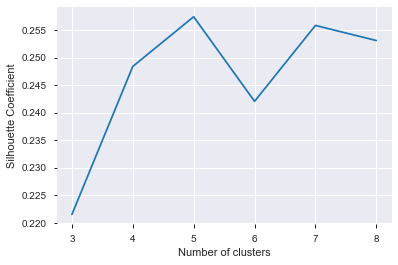

In [147]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

# Elbow analysis

In [148]:
cluster_range = range( 2, 20 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( credit_scaled2 )
    cluster_errors.append( clusters.inertia_ )

In [149]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

clusters_df[0:10]

,num_clusters,cluster_errors
0,2,94178.343427
1,3,80313.015551
2,4,71625.065561
3,5,65154.085226
4,6,59439.770290
5,7,54857.571041
6,8,50001.517078
7,9,46257.996288
8,10,42851.316761
9,11,40866.300952


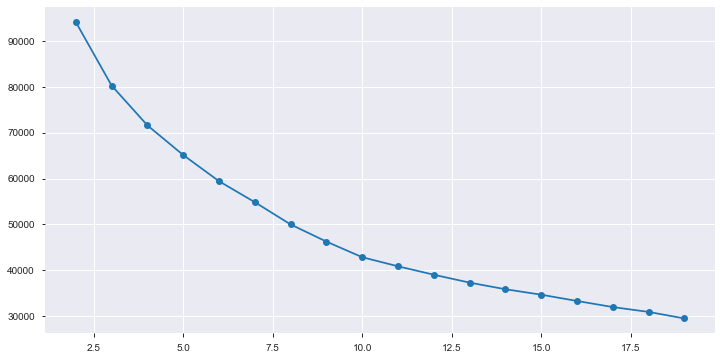

In [150]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

#  profiling

In [151]:
credit_seg_new.head()

,BALANCE_FREQUENCY,PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,PRC_FULL_PAYMENT,...,Purchase_types_installment,Purchase_types_oneoff,Limit_ratio,paymt_ratio,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8
0,0.818182,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2.0,0.000000,...,1,0,4.090075,144.650844,1,0,4,0,2,0
1,0.909091,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0.0,0.222222,...,0,0,45.749535,382.624146,2,3,0,1,3,7
2,1.000000,773.17,0.000000,1.000000,1.000000,0.000000,0.000000,0,12.0,0.000000,...,0,1,33.268651,99.168154,1,2,2,3,0,4
3,0.636364,1499.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1.0,0.000000,...,0,1,22.222274,0.000000,1,2,2,3,0,4
4,1.000000,16.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1.0,0.000000,...,0,1,68.142861,277.107453,1,2,2,3,0,4


In [152]:
credit_seg_new.cluster_3.value_counts()*100/sum(credit_seg_new.cluster_3.value_counts())

1    43.486034
0    29.396648
2    27.117318
Name: cluster_3, dtype: float64

In [153]:
pd.Series.sort_index(credit_seg_new.cluster_5.value_counts())

0    1838
1    2320
2    1702
3     744
4    2346
Name: cluster_5, dtype: int64

In [154]:
credit_seg_new.cluster_3.size

8950

In [155]:
credit_seg_new.cluster_3.value_counts()/credit_seg_new.cluster_3.size

1    0.434860
0    0.293966
2    0.271173
Name: cluster_3, dtype: float64

In [156]:
C5=pd.concat([credit_scaled2,pd.Series(km_5.labels_,name='cluster_5')],axis=1)

In [157]:
# Mean value of each variable group by Cluster- 5
cluster_5_output=C5.groupby('cluster_5').apply(lambda x: x[list_var].mean()).T
cluster_5_output

cluster_5,0,1,2,3,4
CASH_ADVANCE_TRX,0.236425,-0.328776,-0.286784,2.595981,-0.475316
CASH_ADVANCE_FREQUENCY,0.480300,-0.362328,-0.280962,2.345593,-0.558020
Limit_ratio,0.522739,-0.082638,-0.088118,0.666363,-0.475222
PRC_FULL_PAYMENT,-0.407577,0.122175,-0.164270,-0.383392,0.439264
PURCHASES_FREQUENCY,-1.214767,0.879778,-0.418084,-0.228435,0.457456
BALANCE_FREQUENCY,0.015618,0.416086,-0.235600,0.409295,-0.382588
ONEOFF_PURCHASES_FREQUENCY,-0.678661,0.916339,0.401918,-0.086571,-0.638612
PURCHASES_TRX,-0.673391,1.012187,-0.368225,-0.153710,-0.157503
paymt_ratio,-0.107738,0.118997,-0.014313,-0.123193,0.016183
TENURE,-0.131247,0.232811,-0.008990,-0.228878,-0.048296


In [158]:
size=pd.concat([pd.Series(credit_seg_new.cluster_3.size), pd.Series.sort_index(credit_seg_new.cluster_3.value_counts()), pd.Series.sort_index(credit_seg_new.cluster_4.value_counts()),
           pd.Series.sort_index(credit_seg_new.cluster_5.value_counts()), pd.Series.sort_index(credit_seg_new.cluster_6.value_counts()),
           pd.Series.sort_index(credit_seg_new.cluster_7.value_counts()), pd.Series.sort_index(credit_seg_new.cluster_8.value_counts())])

In [159]:
size

0    8950
0    2631
1    3892
2    2427
0    2455
1    2449
2    1842
3    2204
0    1838
1    2320
2    1702
3     744
4    2346
0    1534
1    1794
2    1136
3    1634
4     686
5    2166
0    1288
1    1106
2    2208
3    1658
4    1021
5     652
6    1017
0    1384
1     629
2     583
3    2078
4    1529
5       5
6    1113
7    1629
dtype: int64

In [160]:
Seg_size=pd.DataFrame(size, columns=['Seg_size'])
Seg_Pct = pd.DataFrame(size/credit_seg_new.cluster_3.size, columns=['Seg_Pct'])

In [161]:
Seg_Pct.T

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
Seg_Pct,1.0,0.293966,0.43486,0.271173,0.274302,0.273631,0.20581,0.246257,0.205363,0.259218,...,0.072849,0.113631,0.154637,0.070279,0.06514,0.232179,0.170838,0.000559,0.124358,0.182011


In [162]:
pd.concat([Seg_size.T, Seg_Pct.T], axis=0)

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
Seg_size,8950.0,2631.000000,3892.00000,2427.000000,2455.000000,2449.000000,1842.00000,2204.000000,1838.000000,2320.000000,...,652.000000,1017.000000,1384.000000,629.000000,583.00000,2078.000000,1529.000000,5.000000,1113.000000,1629.000000
Seg_Pct,1.0,0.293966,0.43486,0.271173,0.274302,0.273631,0.20581,0.246257,0.205363,0.259218,...,0.072849,0.113631,0.154637,0.070279,0.06514,0.232179,0.170838,0.000559,0.124358,0.182011


In [163]:
credit_seg_new.head(10)

,BALANCE_FREQUENCY,PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,PRC_FULL_PAYMENT,...,Purchase_types_installment,Purchase_types_oneoff,Limit_ratio,paymt_ratio,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8
0,0.818182,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2.0,0.000000,...,1,0,4.090075,144.650844,1,0,4,0,2,0
1,0.909091,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0.0,0.222222,...,0,0,45.749535,382.624146,2,3,0,1,3,7
2,1.000000,773.17,0.000000,1.000000,1.000000,0.000000,0.000000,0,12.0,0.000000,...,0,1,33.268651,99.168154,1,2,2,3,0,4
3,0.636364,1499.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1.0,0.000000,...,0,1,22.222274,0.000000,1,2,2,3,0,4
4,1.000000,16.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1.0,0.000000,...,0,1,68.142861,277.107453,1,2,2,3,0,4
5,1.000000,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8.0,0.000000,...,1,0,100.546042,58.160144,1,0,4,5,2,3
6,1.000000,7091.01,0.000000,1.000000,1.000000,1.000000,0.000000,0,64.0,1.000000,...,0,0,4.646376,3208.181984,0,1,1,2,1,6
7,1.000000,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12.0,0.000000,...,1,0,79.289250,127.635658,1,0,4,5,2,3
8,1.000000,861.49,0.000000,0.333333,0.083333,0.250000,0.000000,0,5.0,0.000000,...,0,0,14.498950,220.627980,0,0,1,5,2,3
9,0.545455,1281.60,0.000000,0.166667,0.166667,0.000000,0.000000,0,3.0,0.000000,...,0,1,1.383873,1161.260542,1,2,2,3,6,4


In [164]:
# Mean value gives a good indication of the distribution of data. So we are finding mean value for each variable for each cluster
Profling_output = pd.concat([credit_seg_new.apply(lambda x: x.mean()).T, credit_seg_new.groupby('cluster_3').apply(lambda x: x.mean()).T, credit_seg_new.groupby('cluster_4').apply(lambda x: x.mean()).T,
        credit_seg_new.groupby('cluster_5').apply(lambda x: x.mean()).T, credit_seg_new.groupby('cluster_6').apply(lambda x: x.mean()).T,
          credit_seg_new.groupby('cluster_7').apply(lambda x: x.mean()).T, credit_seg_new.groupby('cluster_8').apply(lambda x: x.mean()).T], axis=1)


In [165]:
Profling_output

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
BALANCE_FREQUENCY,0.878083,0.969707,0.798686,0.906083,0.789213,0.980099,0.834121,0.900460,0.881738,0.975455,...,0.971724,0.326828,0.650347,0.978998,0.774194,0.980145,0.837658,0.400000,0.982576,0.907608
PURCHASES,936.229237,2212.582216,607.447731,79.835719,543.974648,2293.369571,734.427552,33.809564,2.094342,2302.674841,...,719.856687,320.993815,607.026785,709.740366,385.522007,915.684013,690.813067,210.304000,3510.144933,0.646525
CASH_ADVANCE,935.920972,659.288696,327.405511,2211.636545,224.927516,721.818007,800.043020,2079.348506,1640.708154,402.267101,...,4204.101803,356.838734,85.302891,4226.359949,1195.074203,466.536862,572.739789,4146.069282,358.979477,1619.317121
PURCHASES_FREQUENCY,0.490351,0.833431,0.526028,0.061220,0.671428,0.844678,0.319285,0.037905,0.002806,0.843448,...,0.387866,0.264837,0.633079,0.377711,0.422970,0.712384,0.313331,0.200000,0.957802,0.001125
ONEOFF_PURCHASES_FREQUENCY,0.202458,0.457321,0.142187,0.022824,0.017081,0.478147,0.319059,0.005160,0.000000,0.475819,...,0.182215,0.058486,0.036016,0.181475,0.107915,0.133449,0.313113,0.016667,0.744787,0.000000
PURCHASES_INSTALLMENTS_FREQUENCY,0.364437,0.665667,0.365367,0.036398,0.625972,0.676729,0.000000,0.030691,0.002297,0.676662,...,0.266412,0.198781,0.579946,0.257831,0.293321,0.630782,0.000000,0.200000,0.730044,0.000972
CASH_ADVANCE_FREQUENCY,0.134017,0.097388,0.044254,0.317669,0.026517,0.107625,0.117484,0.296902,0.227934,0.063167,...,0.616089,0.035279,0.008083,0.612078,0.183145,0.068185,0.081762,0.100000,0.054306,0.226425
CASH_ADVANCE_TRX,3.079330,2.354618,0.819373,7.489081,0.483503,2.644345,2.574919,6.875681,4.385201,1.263362,...,18.512270,0.704031,0.169075,18.817170,2.914237,1.366699,1.585350,1.400000,1.113208,4.469613
PURCHASES_TRX,14.151385,34.156937,8.761819,1.107128,10.859878,35.440139,6.400651,0.640200,0.036453,35.367832,...,11.177193,4.074730,10.718208,11.226598,5.126930,15.908085,6.029431,3.200000,53.418122,0.014733
PRC_FULL_PAYMENT,0.153715,0.185730,0.207437,0.032858,0.286427,0.170430,0.102005,0.030531,0.034505,0.189449,...,0.044418,0.139932,0.495983,0.042756,0.150696,0.030428,0.071784,0.128571,0.321677,0.026335


In [166]:
Profling_output_final=pd.concat([Seg_size.T, Seg_Pct.T, Profling_output], axis=0)

In [167]:
Profling_output_final

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
Seg_size,8950.000000,2631.000000,3892.000000,2427.000000,2455.000000,2449.000000,1842.000000,2204.000000,1838.000000,2320.000000,...,652.000000,1017.000000,1384.000000,629.000000,583.000000,2078.000000,1529.000000,5.000000,1113.000000,1629.000000
Seg_Pct,1.000000,0.293966,0.434860,0.271173,0.274302,0.273631,0.205810,0.246257,0.205363,0.259218,...,0.072849,0.113631,0.154637,0.070279,0.065140,0.232179,0.170838,0.000559,0.124358,0.182011
BALANCE_FREQUENCY,0.878083,0.969707,0.798686,0.906083,0.789213,0.980099,0.834121,0.900460,0.881738,0.975455,...,0.971724,0.326828,0.650347,0.978998,0.774194,0.980145,0.837658,0.400000,0.982576,0.907608
PURCHASES,936.229237,2212.582216,607.447731,79.835719,543.974648,2293.369571,734.427552,33.809564,2.094342,2302.674841,...,719.856687,320.993815,607.026785,709.740366,385.522007,915.684013,690.813067,210.304000,3510.144933,0.646525
CASH_ADVANCE,935.920972,659.288696,327.405511,2211.636545,224.927516,721.818007,800.043020,2079.348506,1640.708154,402.267101,...,4204.101803,356.838734,85.302891,4226.359949,1195.074203,466.536862,572.739789,4146.069282,358.979477,1619.317121
PURCHASES_FREQUENCY,0.490351,0.833431,0.526028,0.061220,0.671428,0.844678,0.319285,0.037905,0.002806,0.843448,...,0.387866,0.264837,0.633079,0.377711,0.422970,0.712384,0.313331,0.200000,0.957802,0.001125
ONEOFF_PURCHASES_FREQUENCY,0.202458,0.457321,0.142187,0.022824,0.017081,0.478147,0.319059,0.005160,0.000000,0.475819,...,0.182215,0.058486,0.036016,0.181475,0.107915,0.133449,0.313113,0.016667,0.744787,0.000000
PURCHASES_INSTALLMENTS_FREQUENCY,0.364437,0.665667,0.365367,0.036398,0.625972,0.676729,0.000000,0.030691,0.002297,0.676662,...,0.266412,0.198781,0.579946,0.257831,0.293321,0.630782,0.000000,0.200000,0.730044,0.000972
CASH_ADVANCE_FREQUENCY,0.134017,0.097388,0.044254,0.317669,0.026517,0.107625,0.117484,0.296902,0.227934,0.063167,...,0.616089,0.035279,0.008083,0.612078,0.183145,0.068185,0.081762,0.100000,0.054306,0.226425
CASH_ADVANCE_TRX,3.079330,2.354618,0.819373,7.489081,0.483503,2.644345,2.574919,6.875681,4.385201,1.263362,...,18.512270,0.704031,0.169075,18.817170,2.914237,1.366699,1.585350,1.400000,1.113208,4.469613


In [168]:
#Profling_output_final.columns = ['Seg_' + str(i) for i in Profling_output_final.columns]
Profling_output_final.columns = ['Overall', 'KM3_1', 'KM3_2', 'KM3_3',
                                'KM4_1', 'KM4_2', 'KM4_3', 'KM4_4',
                                'KM5_1', 'KM5_2', 'KM5_3', 'KM5_4', 'KM5_5',
                                'KM6_1', 'KM6_2', 'KM6_3', 'KM6_4', 'KM6_5','KM6_6',
                                'KM7_1', 'KM7_2', 'KM7_3', 'KM7_4', 'KM7_5','KM7_6','KM7_7',
                                'KM8_1', 'KM8_2', 'KM8_3', 'KM8_4', 'KM8_5','KM8_6','KM8_7','KM8_8',]

In [169]:
Profling_output_final

,Overall,KM3_1,KM3_2,KM3_3,KM4_1,KM4_2,KM4_3,KM4_4,KM5_1,KM5_2,...,KM7_6,KM7_7,KM8_1,KM8_2,KM8_3,KM8_4,KM8_5,KM8_6,KM8_7,KM8_8
Seg_size,8950.000000,2631.000000,3892.000000,2427.000000,2455.000000,2449.000000,1842.000000,2204.000000,1838.000000,2320.000000,...,652.000000,1017.000000,1384.000000,629.000000,583.000000,2078.000000,1529.000000,5.000000,1113.000000,1629.000000
Seg_Pct,1.000000,0.293966,0.434860,0.271173,0.274302,0.273631,0.205810,0.246257,0.205363,0.259218,...,0.072849,0.113631,0.154637,0.070279,0.065140,0.232179,0.170838,0.000559,0.124358,0.182011
BALANCE_FREQUENCY,0.878083,0.969707,0.798686,0.906083,0.789213,0.980099,0.834121,0.900460,0.881738,0.975455,...,0.971724,0.326828,0.650347,0.978998,0.774194,0.980145,0.837658,0.400000,0.982576,0.907608
PURCHASES,936.229237,2212.582216,607.447731,79.835719,543.974648,2293.369571,734.427552,33.809564,2.094342,2302.674841,...,719.856687,320.993815,607.026785,709.740366,385.522007,915.684013,690.813067,210.304000,3510.144933,0.646525
CASH_ADVANCE,935.920972,659.288696,327.405511,2211.636545,224.927516,721.818007,800.043020,2079.348506,1640.708154,402.267101,...,4204.101803,356.838734,85.302891,4226.359949,1195.074203,466.536862,572.739789,4146.069282,358.979477,1619.317121
PURCHASES_FREQUENCY,0.490351,0.833431,0.526028,0.061220,0.671428,0.844678,0.319285,0.037905,0.002806,0.843448,...,0.387866,0.264837,0.633079,0.377711,0.422970,0.712384,0.313331,0.200000,0.957802,0.001125
ONEOFF_PURCHASES_FREQUENCY,0.202458,0.457321,0.142187,0.022824,0.017081,0.478147,0.319059,0.005160,0.000000,0.475819,...,0.182215,0.058486,0.036016,0.181475,0.107915,0.133449,0.313113,0.016667,0.744787,0.000000
PURCHASES_INSTALLMENTS_FREQUENCY,0.364437,0.665667,0.365367,0.036398,0.625972,0.676729,0.000000,0.030691,0.002297,0.676662,...,0.266412,0.198781,0.579946,0.257831,0.293321,0.630782,0.000000,0.200000,0.730044,0.000972
CASH_ADVANCE_FREQUENCY,0.134017,0.097388,0.044254,0.317669,0.026517,0.107625,0.117484,0.296902,0.227934,0.063167,...,0.616089,0.035279,0.008083,0.612078,0.183145,0.068185,0.081762,0.100000,0.054306,0.226425
CASH_ADVANCE_TRX,3.079330,2.354618,0.819373,7.489081,0.483503,2.644345,2.574919,6.875681,4.385201,1.263362,...,18.512270,0.704031,0.169075,18.817170,2.914237,1.366699,1.585350,1.400000,1.113208,4.469613


In [170]:
#Profling_output_final.to_csv('Profiling_output.csv')

In [171]:
credit_scaled2.head()

,CASH_ADVANCE_TRX,CASH_ADVANCE_FREQUENCY,Limit_ratio,PRC_FULL_PAYMENT,PURCHASES_FREQUENCY,BALANCE_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_TRX,paymt_ratio,TENURE,Purchase_types_both,Purchase_types_oneoff,Purchase_types_cash
0,-0.557505,-0.685371,-0.979686,-0.525551,-0.806490,-0.255968,-0.678661,-0.579714,-0.268383,0.36068,-0.670193,-0.514625,-0.543690
1,0.166685,0.593147,0.205564,0.234227,-1.221758,0.132501,-0.678661,-0.675130,-0.111512,0.36068,-0.670193,-0.514625,1.839282
2,-0.557505,-0.685371,-0.149528,-0.525551,1.269843,0.520970,2.673451,-0.102638,-0.298365,0.36068,-0.670193,1.943162,-0.543690
3,-0.376457,-0.259200,-0.463808,-0.525551,-1.014125,-1.032906,-0.399319,-0.627422,-0.363736,0.36068,-0.670193,1.943162,-0.543690
4,-0.557505,-0.685371,0.842675,-0.525551,-1.014125,0.520970,-0.399319,-0.627422,-0.181068,0.36068,-0.670193,1.943162,-0.543690


In [172]:
centroids = km_5.cluster_centers_
centroids

array([[ 0.23642467,  0.4803003 ,  0.52273903, -0.40757708, -1.21476731,
         0.01561837, -0.67866081, -0.67339063, -0.10773823, -0.13124746,
        -0.67019253, -0.514625  ,  1.80168331],
       [-0.32877619, -0.36232809, -0.08263814,  0.12217453,  0.87977755,
         0.41608628,  0.91633916,  1.01218734,  0.11899735,  0.23281112,
         1.46507977, -0.5029717 , -0.54369045],
       [-0.28678449, -0.28096217, -0.08811843, -0.16427048, -0.41808372,
        -0.23559997,  0.4019176 , -0.36822528, -0.01431269, -0.00898971,
        -0.67019253,  1.94316249, -0.54369045],
       [ 2.59598084,  2.34559269,  0.66636285, -0.38339212, -0.22843451,
         0.40929498, -0.08657051, -0.15370982, -0.12319293, -0.22887768,
         0.07673136,  0.01723493,  0.13212563],
       [-0.47531556, -0.55801967, -0.47522176,  0.43926422,  0.45745616,
        -0.38258784, -0.63861193, -0.15750346,  0.01618276, -0.04829645,
        -0.46188902, -0.514625  , -0.52134374]])

In [173]:
km_5.predict(credit_scaled2)

array([4, 0, 2, ..., 4, 0, 2])

In [174]:
credit_scaled2['pred_segment'] = pd.Series(km_5.predict(credit_scaled2))

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [175]:
credit_scaled2.head(20)

,CASH_ADVANCE_TRX,CASH_ADVANCE_FREQUENCY,Limit_ratio,PRC_FULL_PAYMENT,PURCHASES_FREQUENCY,BALANCE_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_TRX,paymt_ratio,TENURE,Purchase_types_both,Purchase_types_oneoff,Purchase_types_cash,pred_segment
0,-0.557505,-0.685371,-0.979686,-0.525551,-0.806490,-0.255968,-0.678661,-0.579714,-0.268383,0.360680,-0.670193,-0.514625,-0.543690,4
1,0.166685,0.593147,0.205564,0.234227,-1.221758,0.132501,-0.678661,-0.675130,-0.111512,0.360680,-0.670193,-0.514625,1.839282,0
2,-0.557505,-0.685371,-0.149528,-0.525551,1.269843,0.520970,2.673451,-0.102638,-0.298365,0.360680,-0.670193,1.943162,-0.543690,2
3,-0.376457,-0.259200,-0.463808,-0.525551,-1.014125,-1.032906,-0.399319,-0.627422,-0.363736,0.360680,-0.670193,1.943162,-0.543690,2
4,-0.557505,-0.685371,0.842675,-0.525551,-1.014125,0.520970,-0.399319,-0.627422,-0.181068,0.360680,-0.670193,1.943162,-0.543690,2
5,-0.557505,-0.685371,1.764575,-0.525551,0.439310,0.520970,-0.678661,-0.293468,-0.325397,0.360680,-0.670193,-0.514625,-0.543690,4
6,-0.557505,-0.685371,-0.963859,2.893453,1.269843,0.520970,2.673451,2.378162,1.751085,0.360680,1.492109,-0.514625,-0.543690,1
7,-0.557505,-0.685371,1.159800,-0.525551,1.269843,0.520970,-0.678661,-0.102638,-0.279599,0.360680,-0.670193,-0.514625,-0.543690,4
8,-0.557505,-0.685371,-0.683544,-0.525551,-0.391225,0.520970,-0.399319,-0.436591,-0.218299,0.360680,1.492109,-0.514625,-0.543690,1
9,-0.557505,-0.685371,-1.056680,-0.525551,-0.806490,-1.421375,-0.119974,-0.532007,0.401762,0.360680,-0.670193,1.943162,-0.543690,2


###  Based on Silhoutee coeficient and profiling we chose 5 clusters